In [70]:
import pandas as pd


In [71]:
df = pd.read_csv('final_data.csv')
df_full = df

# df = df[df['Location'] != 'BR']

# One-hot encode the 'Location' column
df_encoded = pd.get_dummies(df, columns=['Location'])
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])  # Convert to datetime if not already
df_encoded['Month'] = df_encoded['Date'].dt.month  # Extract month as integer (1-12)

df_encoded.set_index('Date', inplace=True)


df_encoded

,Precip Mean (in),Precip Std (in),UV Index Mean,UV Index Std,Sea Level Pressure Mean,Sea Level Pressure Std,Max Air Temp Mean (F),Max Air Temp Std (F),Min Air Temp Mean (F),Min Air Temp Std (F),...,Avg Humidity Mean (%),Avg Humidity Std (%),Wind Speed Mean (mph),Wind Speed Std (mph),Production,Previous Month,Location_BR,Location_CA,Location_FL,Month
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.084113,0.150124,0.151025,0.092443,0.315062,0.052643,54.779724,5.714668,39.490092,3.269914,...,88.161866,4.629392,4.263306,1.979104,0.657143,0.657143,False,True,False,1
2010-02-28,0.077500,0.122593,0.266584,0.101418,0.399829,0.051508,60.862946,4.334016,42.625893,3.115623,...,85.723214,3.120897,3.875000,1.395338,0.657143,0.657143,False,True,False,2
2010-03-31,0.023162,0.058168,0.499310,0.123196,0.321871,0.071581,66.651152,7.516172,39.754666,3.709048,...,69.672811,9.265417,4.770449,1.449245,0.657143,0.657143,False,True,False,3
2010-04-30,0.063458,0.140083,0.590567,0.181362,0.351417,0.081193,68.337083,7.577927,42.756667,4.113720,...,67.433333,8.244299,5.058750,1.436175,0.885714,0.657143,False,True,False,4
2010-05-31,0.008105,0.017601,0.761757,0.124038,0.336467,0.095164,76.387500,6.710604,47.235138,4.148557,...,51.389401,9.074577,5.438825,1.500282,0.885714,0.885714,False,True,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,0.254103,0.397336,0.696552,0.189892,0.453144,0.118640,83.372414,4.835427,67.762069,2.752325,...,76.479310,7.526448,12.824138,2.219661,0.500849,0.500849,True,False,False,2
2024-04-30,0.005533,0.021615,0.490000,0.109387,0.487320,0.056641,81.993333,4.794460,65.940000,3.277047,...,72.630000,8.036260,10.943333,1.673461,0.500849,0.500849,True,False,False,4
2024-05-31,0.036226,0.136033,0.393548,0.123654,0.531056,0.108047,78.519355,8.926717,62.651613,5.155313,...,68.054839,13.792820,11.541935,2.758958,0.090924,0.500849,True,False,False,5


In [72]:
X = df_encoded.drop(columns=['Production'])  # All columns except 'Production'
y = df_encoded['Production']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)
y_pred

array([ 4.32818719e-01,  4.89282913e-01,  7.84052501e-01,  4.14025416e-01,
        3.20613815e-02,  6.09002811e-01,  4.35439506e-01,  5.46365881e-02,
        1.03248582e+00,  1.64648534e-01,  5.65533169e-01,  9.06945274e-01,
        1.00987507e+00,  1.50904676e-01,  3.34081738e-01,  6.43998274e-01,
        8.58515375e-01,  9.33321426e-01,  2.88232285e-01,  4.36564777e-01,
        2.68037809e-01,  1.17841222e-01,  1.65149031e-01,  5.83758267e-01,
        5.64718177e-01,  8.66528656e-01,  1.55188375e-01,  2.15101472e-01,
        4.41773554e-01,  4.73383129e-01,  4.21335038e-01,  1.62892545e-01,
        4.97097591e-01,  6.64674851e-01,  8.39813901e-01,  2.50354994e-01,
        8.56804138e-01,  1.84107390e-01,  3.40134198e-01,  9.48221691e-01,
        5.20175979e-01,  7.84818561e-01,  7.15336738e-01,  2.13235736e-01,
        2.43293472e-01,  3.74446388e-02,  4.05783548e-01,  1.64163839e-01,
        7.77668521e-01,  3.93820575e-01,  2.14566962e-02,  4.12900367e-01,
        8.77558287e-01,  

In [76]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.014054577529172036


In [77]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.8481147903019903


In [78]:
# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.95711962e-01  1.34557695e-01  6.96156633e-02 -3.10406977e-02
 -4.13825844e-02  2.33598103e-02 -1.64038238e-02 -1.05927040e-02
 -1.14142517e-02 -5.90841537e-03  2.56621275e-02  1.39946889e-02
  2.54384888e-04 -5.40845496e-03 -7.09601058e-03 -1.21203532e-02
  9.46671420e-01  4.45371214e-02 -5.95298984e-02  1.49927770e-02
 -1.74146011e-03]
Intercept: 0.3765489406627718


In [79]:
from sklearn.linear_model import LassoCV


lasso = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
lasso.fit(X_train, y_train)

# Predict on test set
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print (f"R2 Score: {r2}")
print(f"Best Alpha (Regularization Strength): {lasso.alpha_}")

# Print model coefficients
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

c:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00275137419440874, tolerance: 0.0018311813654175156
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00279147369616628, tolerance: 0.0018311813654175156
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002656130624773878, tolerance: 0.0018311813654175156
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate

Mean Squared Error: 0.012959171370635653
R2 Score: 0.8599526412618257
Best Alpha (Regularization Strength): 0.0013581929589682532
Coefficients: [-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.15803778e-03 -3.82584180e-05
  1.17248128e-03 -0.00000000e+00  5.31840306e-03  0.00000000e+00
 -1.39353223e-03 -6.63390742e-03  1.14634298e-03 -9.06913453e-03
  9.34192542e-01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.06552365e-03]
Intercept: 0.41897782558355834


c:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011327592333522318, tolerance: 0.0018715405613960589
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011947074206074326, tolerance: 0.0018715405613960589
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008189168816590708, tolerance: 0.0018715405613960589
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordina

In [80]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")


# Perform K-Fold Cross Validation (e.g., 5-fold)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for better readability
cv_scores = -cv_scores

# Print the cross-validation scores and the average score
print(f"Cross-validation MSE scores: {cv_scores}")
print(f"Average Cross-validation MSE: {np.mean(cv_scores)}")

# Print feature importances
importances = rf_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Mean Squared Error: 0.012004439353777856
R2 Score: 0.8702702528929733
MAPE: 8372749607268.908
Cross-validation MSE scores: [0.01867631 0.01476559 0.02269861 0.01361006 0.03077194]
Average Cross-validation MSE: 0.020104502533307998
Feature Importances:
Precip Mean (in): 0.0031
Precip Std (in): 0.0029
UV Index Mean: 0.0022
UV Index Std: 0.0027
Sea Level Pressure Mean: 0.0024
Sea Level Pressure Std: 0.0024
Max Air Temp Mean (F): 0.0024
Max Air Temp Std (F): 0.0009
Min Air Temp Mean (F): 0.0010
Min Air Temp Std (F): 0.0026
Avg Air Temp Mean (F): 0.0013
Avg Air Temp Std (F): 0.0015
Avg Humidity Mean (%): 0.0028
Avg Humidity Std (%): 0.0075
Wind Speed Mean (mph): 0.0022
Wind Speed Std (mph): 0.0044
Previous Month: 0.9513
Location_BR: 0.0034
Location_CA: 0.0001
Location_FL: 0.0013
Month: 0.0015


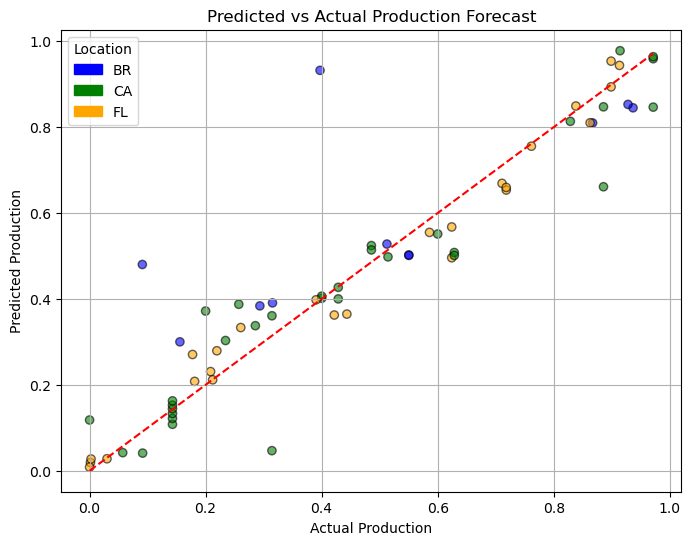

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define colors for each location
colors = {
    'BR': 'blue',
    'CA': 'green',
    'FL': 'orange'
}

# Assign colors based on location columns
color_list = []
for i in range(len(y_test)):
    if X_test.iloc[i]['Location_BR'] == 1:
        color_list.append(colors['BR'])
    elif X_test.iloc[i]['Location_CA'] == 1:
        color_list.append(colors['CA'])
    elif X_test.iloc[i]['Location_FL'] == 1:
        color_list.append(colors['FL'])
    else:
        color_list.append('gray')  # Default color for unknown location

# Scatter plot of Predicted vs Actual with color coding
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=color_list, alpha=0.6, edgecolors='k')

# Line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Create legend handles
legend_patches = [mpatches.Patch(color=color, label=location) for location, color in colors.items()]
plt.legend(handles=legend_patches, title="Location")

# Labels and title
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Predicted vs Actual Production Forecast')
plt.grid(True)
plt.show()



In [82]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Train Random Forest Regressor model on the entire dataset
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)  # Train on entire dataset

# Predict on the entire dataset
y_full_pred = rf_model.predict(X)

# Evaluate the model (using the entire dataset predictions)
mse_full = mean_squared_error(y, y_full_pred)
print(f"Mean Squared Error (on full dataset): {mse_full}")

r2_full = r2_score(y, y_full_pred)
print(f"R2 Score (on full dataset): {r2_full}")

mape_full = mean_absolute_percentage_error(y, y_full_pred)
print(f"MAPE (on full dataset): {mape_full}")

# Store predictions in a DataFrame
predictions_df = pd.DataFrame({'True Values': y, 'Predicted Values': y_full_pred})

# Display the DataFrame with true values and predicted values
print(predictions_df.head())  # Display the first few rows of the DataFrame


Mean Squared Error (on full dataset): 0.0013777865013456614
R2 Score (on full dataset): 0.9842596494181666
MAPE (on full dataset): 4275784058690.068
            True Values  Predicted Values
Date                                     
2010-01-31     0.657143          0.655294
2010-02-28     0.657143          0.662775
2010-03-31     0.657143          0.709313
2010-04-30     0.885714          0.804463
2010-05-31     0.885714          0.881676
